# Statistical Analysis
## Questions
1. What are the statistical differences in the distributions of features across seizure, pre-epileptic, and normal states?
2. Whether the syntax-dependent feature may help the seizure prediction?
    - Whether role do syntax-dependent features play in distinguishing between seizure, pre-seizure, and normal states?
    - How do syntax-dependent features compare to non-syntax features (e.g., word sequence entropy) in terms of distribution and 
    their ability to predict seizures?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Preprocess Dataframes

## 1.1 Filter Dataframe [Optional]

In [2]:
seizures = pd.read_csv('/data1/seizures_data.csv' , sep=',')

In [3]:
import pandas as pd
import re

def span_length_k_keys(code, k):
    pattern = r'pre_(\d+)_end_(\d+)'
    match = re.match(pattern, code)
    if match:
        num1, num2 = map(int, match.groups())  # Extract and convert to integers
        return num2 == num1 + k  # Check if second number is first + k
    return False

def is_span_length_less_euqal_than_k(code, k):
    pattern = r'pre_(\d+)_end_(\d+)'
    match = re.match(pattern, code)
    if match:
        num1, num2 = map(int, match.groups())  # Extract and convert to integers
        return num2 - num1 <= k  # Check if second number is first + k
    return False

MAX_K = 100
final_df = seizures.copy()  # Start with a copy of the original DataFrame
print(f"delete spans that length > {MAX_K}")
final_df = final_df[final_df['Key'].apply(lambda x: is_span_length_less_euqal_than_k(x, MAX_K))]
print(f"new df length = {len(final_df)}" )

# Loop over k and generate the new rows
for k in tqdm(range(2, MAX_K)):
    # Filter rows where the 'Key' matches the span_length_k_keys condition
    filtered_final_df = final_df[final_df['Key'].apply(lambda x: span_length_k_keys(x, k))]
    
    # Compute the average for each 'id'
    averages = (
        filtered_final_df
        .groupby('id')['Value']
        .mean()
        .reset_index()
        .rename(columns={'Value': 'average_value'})
    )
    
    # Create the new span_k rows
    span_k_rows = averages.copy()
    span_k_rows['Key'] = f'span_{k}'
    span_k_rows['Value'] = span_k_rows['average_value']
    span_k_rows = span_k_rows[['id', 'Key', 'Value']]  # Keep necessary columns
    
    # Concatenate the new rows into the final DataFrame
    final_df = pd.concat([final_df, span_k_rows], ignore_index=True)
    
    # Remove rows that match the pattern 'pre_{?}_end_{? + k}'
    final_df = final_df[~final_df['Key'].apply(lambda x: span_length_k_keys(x, k))]
    print(f"new df length = {len(final_df)}" )

# Print the final DataFrame
print(final_df)


NameError: name 'seizures' is not defined

In [12]:
seizures

,Key,Value,id
0,derivation_entropy,1.916090,1
1,word_entropy,2.137500,1
2,word_delay_1_mutual_entropy,1.574740,1
3,word_delay_2_mutual_entropy,1.426300,1
4,word_delay_3_mutual_entropy,1.365370,1
...,...,...,...
50839298,path_average_symbol_entropy,1.303770,178331
50839299,average_layer_symbol_skewness,-0.177105,178331
50839300,average_layer_derivation_skewness,0.707101,178331
50839301,average_layer_symbol_KL_divergence,0.035666,178331


In [ ]:
list(seizures['Key'].unique())

['derivation_entropy',
 'word_entropy',
 'word_delay_1_mutual_entropy',
 'word_delay_2_mutual_entropy',
 'word_delay_3_mutual_entropy',
 'word_delay_4_mutual_entropy',
 'word_delay_5_mutual_entropy',
 'derivation_delay_1_mutual_entropy',
 'derivation_delay_2_mutual_entropy',
 'derivation_delay_3_mutual_entropy',
 'derivation_delay_4_mutual_entropy',
 'derivation_delay_5_mutual_entropy',
 'word_delay_1_transitional_entropy',
 'word_delay_2_transitional_entropy',
 'word_delay_3_transitional_entropy',
 'word_delay_4_transitional_entropy',
 'word_delay_5_transitional_entropy',
 'derivation_delay_1_transitional_entropy',
 'derivation_delay_2_transitional_entropy',
 'derivation_delay_3_transitional_entropy',
 'derivation_delay_4_transitional_entropy',
 'derivation_delay_5_transitional_entropy',
 'word_delay_1_transfer_entropy',
 'word_delay_2_transfer_entropy',
 'word_delay_3_transfer_entropy',
 'word_delay_4_transfer_entropy',
 'word_delay_5_transfer_entropy',
 'derivation_delay_1_transfer_

In [3]:
preepileptic = pd.read_csv('/data1/pre-epileptic_data.csv' , sep=',')

In [ ]:
from random import shuffle

n_parts = 8
normal_parts = []
for part_id in range(n_parts):
    df = pd.read_csv(f'/data1/normal_data.{part_id + 1}.csv' , sep=',')
    print(f'/data1/normal_data.{part_id + 1}.csv has been read')
    ids = list(df['id'].unique())
    shuffle(ids)
    sampled_ids = ids[:100000]
    df = df[df['id'].isin(sampled_ids)]
    normal_parts.append(df)
normal = pd.concat(normal_parts, ignore_index=True)


/data1/normal_data.1.csv has been read
/data1/normal_data.2.csv has been read
/data1/normal_data.3.csv has been read
/data1/normal_data.4.csv has been read
/data1/normal_data.5.csv has been read
/data1/normal_data.6.csv has been read
/data1/normal_data.7.csv has been read
/data1/normal_data.8.csv has been read


In [21]:
normal

,Key,Value,id
0,derivation_entropy,1.808050,1
1,word_entropy,1.329660,1
2,word_delay_1_mutual_entropy,-0.799986,1
3,word_delay_2_mutual_entropy,-0.616884,1
4,word_delay_3_mutual_entropy,-0.433782,1
...,...,...,...
315570455,redundancy,4.000000,3935943
315570456,traversal_steps,10.000000,3935943
315570457,skewness,-4.000000,3935943
315570458,density,0.158730,3935943


In [5]:
def plot_distribution_of_record_items(key_name):
    
    plt.figure(figsize=(10, 6))

    # Create a seaborn distribution plot
    #sns.histplot(seizures[seizures.Key == 'derivation_entropy']['Value'], kde=True, bins=30)  # Adjust bins as needed
    sns.kdeplot(seizures[seizures.Key == key_name]['Value'], color="red", label="KDE")
    sns.kdeplot(preepileptic[preepileptic.Key == key_name]['Value'], color="blue", label="KDE")
    sns.kdeplot(normal[normal.Key == key_name]['Value'], color="green", label="KDE")

    # Customize the plot
    plt.title(f'Distribution of {key_name}')
    plt.xlabel(key_name)
    plt.ylabel('Frequency')
    plt.legend(["Seizure", "Pre-epileptic (length = 5 minutes)", "Normal"])
    
def box_plot_record_items(key_name):
    
    plt.figure(figsize=(10, 6))

    seizure_data = seizures[seizures.Key == key_name]['Value']
    preepileptic_data = preepileptic[preepileptic.Key == key_name]['Value']
    normal_data = normal[normal.Key == key_name]['Value']
    data = pd.DataFrame({
        'Distribution': ['Seizure'] * len(seizure_data) + ['Pre-epileptic (length = 5 minutes)']*len(preepileptic_data) + ['Normal']*len(normal_data),
        'Value': list(seizure_data) + list(preepileptic_data) + list(normal_data)
    })
    sns.boxplot(x='Distribution', y='Value', data=data)

    plt.title(f'Box plot of {key_name}')
    plt.xlabel(key_name)
    plt.ylabel('Value')
    #plt.legend(["Seizure", "Pre-epileptic (length = 5 minutes)", "Normal"])

def plot_all_graph(key_name):
    plot_distribution_of_record_items(key_name)
    box_plot_record_items(key_name)
    
def one_way_anova(key_name):
    from scipy.stats import f_oneway

    seizure_data = seizures[seizures.Key == key_name]['Value'].dropna()
    preepileptic_data = preepileptic[preepileptic.Key == key_name]['Value'].dropna()
    normal_data = normal[normal.Key == key_name]['Value'].dropna()
    return f_oneway(seizure_data, preepileptic_data, normal_data)


In [16]:
def pairwise_comparisons(key_name):
    from scipy.stats import mannwhitneyu
    from statsmodels.stats.multitest import multipletests

    # Filter the data based on the key_name
    seizure_data = seizures[seizures.Key == key_name]['Value'].dropna()
    preepileptic_data = preepileptic[preepileptic.Key == key_name]['Value'].dropna()
    normal_data = normal[normal.Key == key_name]['Value'].dropna()

    # Pairwise comparisons (Mann-Whitney U test)
    groups = {
        'Seizure vs Preepileptic': (seizure_data, preepileptic_data),
        'Seizure vs Normal': (seizure_data, normal_data),
        'Preepileptic vs Normal': (preepileptic_data, normal_data)
    }

    results = []
    for comparison, (group1, group2) in groups.items():
        stat, p_value = mannwhitneyu(group1, group2)
        results.append((comparison, stat, p_value))

    # Adjust p-values using Bonferroni correction
    p_values = [result[2] for result in results]
    adjusted_p_values = multipletests(p_values, method='bonferroni')[1]

    # Print results with adjusted p-values
    for (comparison, stat, p_value), adj_p in zip(results, adjusted_p_values):
        print(f"Comparison: {comparison}, U-statistic: {stat}, Adjusted P-value: {adj_p}")

def pairwise_comparisons_KL(key_name):
    import numpy as np
    from scipy.stats import mannwhitneyu
    from scipy.stats import entropy
    from statsmodels.stats.multitest import multipletests
    from sklearn.neighbors import KernelDensity


    # Filter the data based on the key_name
    seizure_data = seizures[seizures.Key == key_name]['Value'].dropna()
    preepileptic_data = preepileptic[preepileptic.Key == key_name]['Value'].dropna()
    normal_data = normal[normal.Key == key_name]['Value'].dropna()

    # Pairwise comparisons (Mann-Whitney U test)
    groups = {
        'Seizure vs Preepileptic': (seizure_data, preepileptic_data),
        'Seizure vs Normal': (seizure_data, normal_data),
        'Preepileptic vs Normal': (preepileptic_data, normal_data)
    }

    

    results = []
    for comparison, (group1, group2) in groups.items():
        # Step 1: Estimate PDFs using Kernel Density Estimation (KDE)
        kde1 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(group1).reshape(-1, 1))
        kde2 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(group2).reshape(-1, 1))

        # Create a range of points to evaluate the PDFs
        x = np.linspace(min(group1.min(), group2.min()), max(group1.max(), group2.max()), 1000)

        # Evaluate PDFs at points in range
        p = np.exp(kde1.score_samples(x[:, None]))  # PDF of sequence1
        q = np.exp(kde2.score_samples(x[:, None]))  # PDF of sequence2

        # Normalize PDFs to ensure they sum to 1
        p /= np.sum(p)
        q /= np.sum(q)

        # Step 2: Compute KL divergence
        kl_divergence = entropy(p, q)  # Computes D_KL(P || Q)
        print("KL Divergence:", kl_divergence)

        results.append((comparison, kl_divergence))

    # Print results with adjusted p-values
    for (comparison, kl_divergence) in results:
        print(f"Comparison: {comparison}, KL Distance: {kl_divergence}")



def evaluate_mutual_information(key_name):
    import numpy as np
    from sklearn.feature_selection import mutual_info_classif


    # Filter the data based on the key_name
    seizure_data = seizures[seizures.Key == key_name]['Value'].dropna()
    preepileptic_data = preepileptic[preepileptic.Key == key_name]['Value'].dropna()
    normal_data = normal[normal.Key == key_name]['Value'].dropna()

    # Pairwise comparisons (Mann-Whitney U test)
    groups = {
        'Seizure vs Normal': (seizure_data, normal_data),
        'Preepileptic vs Normal': (preepileptic_data, normal_data)
    }

    

    results = []
   
    for comparison, (group1, group2) in groups.items():
        # Convert groups to arrays
        array_group1 = np.array(group1)
        array_group2 = np.array(group2)

        # Create the feature and target arrays
        features = np.concatenate([array_group1, array_group2]).reshape(-1, 1)
        predictions = np.concatenate([
            np.ones(len(group1)),  # Label group1 as 1
            np.zeros(len(group2)) # Label group2 as 0
        ])

        # Compute mutual information
        mi = mutual_info_classif(features, predictions, discrete_features=False)

        # Store results
        results.append((comparison, mi[0]))

    # Print results with adjusted p-values
    for (comparison, kl_divergence) in results:
        print(f"Comparison: {comparison}, Mutual Information: {kl_divergence}")


Comparison: Seizure vs Normal, Mutual Information: 0.0156254716965456
Comparison: Preepileptic vs Normal, Mutual Information: 0.013157715309105589


In [ ]:
pairwise_comparisons('derivation_entropy')


Comparison: Seizure vs Preepileptic, U-statistic: 10535007351.5, Adjusted P-value: 0.523360512780288
Comparison: Seizure vs Normal, U-statistic: 82760644036.0, Adjusted P-value: 0.0
Comparison: Preepileptic vs Normal, U-statistic: 55137370339.0, Adjusted P-value: 0.0


In [ ]:
evaluate_mutual_information("derivation_entropy")
pairwise_comparisons_KL('derivation_entropy')

KL Divergence: 1.1476186859173381e-06
KL Divergence: 0.0026840625199590594
KL Divergence: 0.002817399282613594
Comparison: Seizure vs Preepileptic, KL Distance: 1.1476186859173381e-06
Comparison: Seizure vs Normal, KL Distance: 0.0026840625199590594
Comparison: Preepileptic vs Normal, KL Distance: 0.002817399282613594


In [ ]:
import numpy as np
from tqdm import tqdm
results = {}
profiled_items = list(seizures.Key.unique())
for profiled_item in tqdm(profiled_items):
    results[profiled_item] = {}
    mi_comparision = evaluate_mutual_information(profiled_item)
    results[profiled_item]["mi_comparision"] = mi_comparision
    kl_comparision = pairwise_comparisons_KL(profiled_item)
    results[profiled_item]["kl_comparision"] = kl_comparision

np.save("feature_evaluation_results.dict", results, allow_pickle=True)

  0%|          | 0/32189 [00:00<?, ?it/s]

Comparison: Seizure vs Normal, Mutual Information: 0.015802693013698965
Comparison: Preepileptic vs Normal, Mutual Information: 0.012982251630809127
KL Divergence: 1.1476186859173381e-06
KL Divergence: 0.0026840625199590594


  0%|          | 1/32189 [03:05<1655:18:26, 185.13s/it]

KL Divergence: 0.002817399282613594
Comparison: Seizure vs Preepileptic, KL Distance: 1.1476186859173381e-06
Comparison: Seizure vs Normal, KL Distance: 0.0026840625199590594
Comparison: Preepileptic vs Normal, KL Distance: 0.002817399282613594
Comparison: Seizure vs Normal, Mutual Information: 0.014316570703239107
Comparison: Preepileptic vs Normal, Mutual Information: 0.011967387116965877
KL Divergence: 5.228570030350703e-05
KL Divergence: 0.011978589327405517


  0%|          | 2/32189 [06:11<1664:20:43, 186.15s/it]

KL Divergence: 0.013414080564230019
Comparison: Seizure vs Preepileptic, KL Distance: 5.228570030350703e-05
Comparison: Seizure vs Normal, KL Distance: 0.011978589327405517
Comparison: Preepileptic vs Normal, KL Distance: 0.013414080564230019
Comparison: Seizure vs Normal, Mutual Information: 0.015768268033165667
Comparison: Preepileptic vs Normal, Mutual Information: 0.013303717001958315
KL Divergence: 2.516745189657418e-06
KL Divergence: 0.01634928343876941


  0%|          | 3/32189 [09:17<1660:24:21, 185.72s/it]

KL Divergence: 0.016248784620020156
Comparison: Seizure vs Preepileptic, KL Distance: 2.516745189657418e-06
Comparison: Seizure vs Normal, KL Distance: 0.01634928343876941
Comparison: Preepileptic vs Normal, KL Distance: 0.016248784620020156
Comparison: Seizure vs Normal, Mutual Information: 0.011530554320308362
Comparison: Preepileptic vs Normal, Mutual Information: 0.01019224130484453
KL Divergence: 3.134501668013742e-05


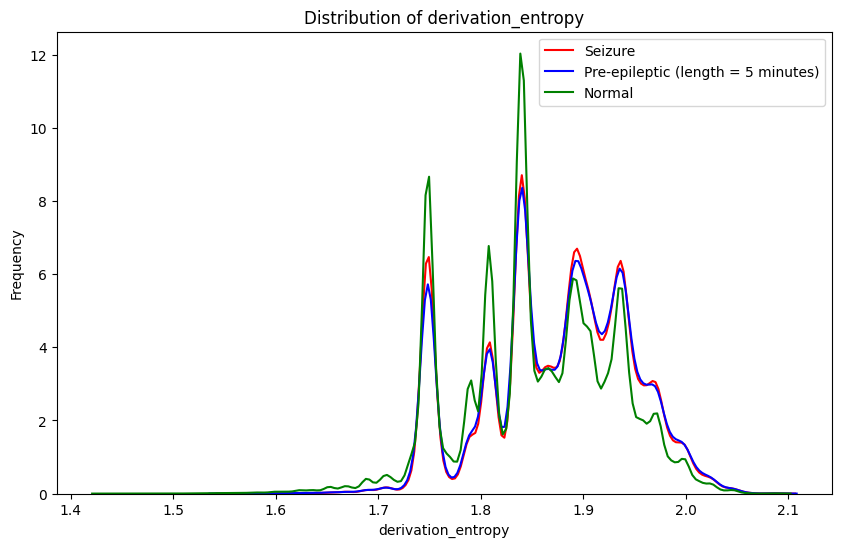

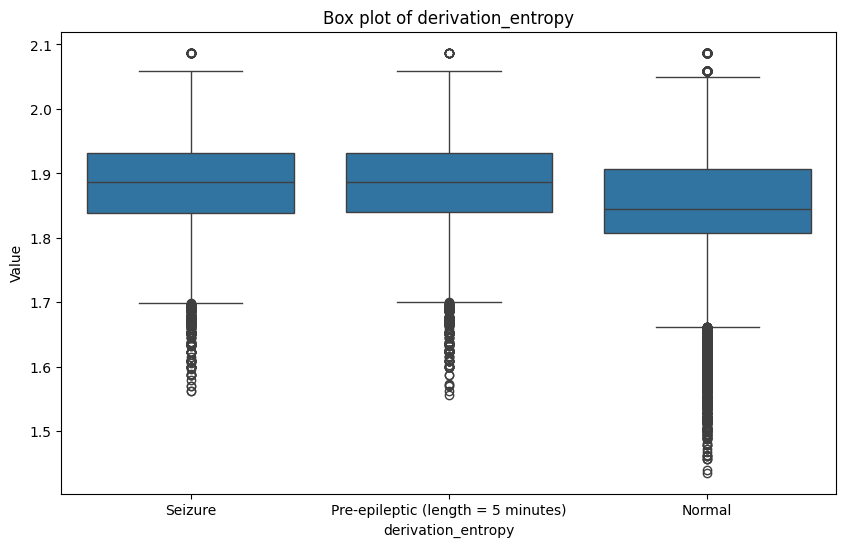

In [49]:
plot_all_graph('derivation_entropy')

In [55]:
f_stat, p_value = friedmanchisquare_validation('derivation_entropy')

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

ValueError: Unequal N in friedmanchisquare.  Aborting.

In [8]:
keys = list(normal.Key.unique())

In [44]:
keys

['derivation_entropy',
 'word_entropy',
 'word_delay_1_mutual_entropy',
 'word_delay_2_mutual_entropy',
 'word_delay_3_mutual_entropy',
 'word_delay_4_mutual_entropy',
 'word_delay_5_mutual_entropy',
 'derivation_delay_1_mutual_entropy',
 'derivation_delay_2_mutual_entropy',
 'derivation_delay_3_mutual_entropy',
 'derivation_delay_4_mutual_entropy',
 'derivation_delay_5_mutual_entropy',
 'depth_of_tree',
 '1_layer_symbol_tree__entropy',
 '2_layer_symbol_tree__entropy',
 '3_layer_symbol_tree__entropy',
 '4_layer_symbol_tree__entropy',
 '5_layer_symbol_tree__entropy',
 '1_layer_derivation_tree__entropy',
 '2_layer_derivation_tree__entropy',
 '3_layer_derivation_tree__entropy',
 '4_layer_derivation_tree__entropy',
 '5_layer_derivation_tree__entropy',
 'pre_2_end_6',
 'pre_2_end_5',
 'pre_2_end_4',
 'pre_2_end_3',
 'pre_2_end_2',
 'pre_3_end_6',
 'pre_3_end_5',
 'pre_3_end_4',
 'pre_3_end_3',
 'pre_4_end_6',
 'pre_4_end_5',
 'pre_4_end_4',
 'pre_5_end_6',
 'pre_5_end_5',
 'pre_6_end_6',
 '

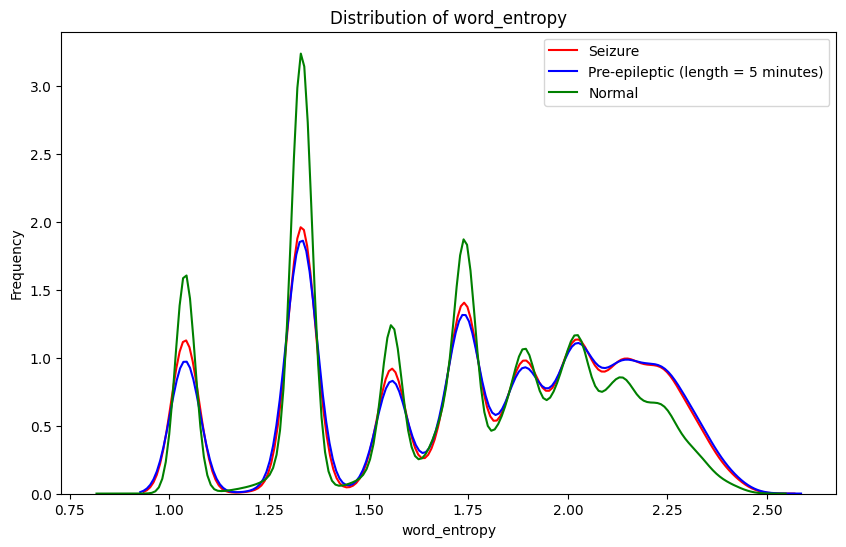

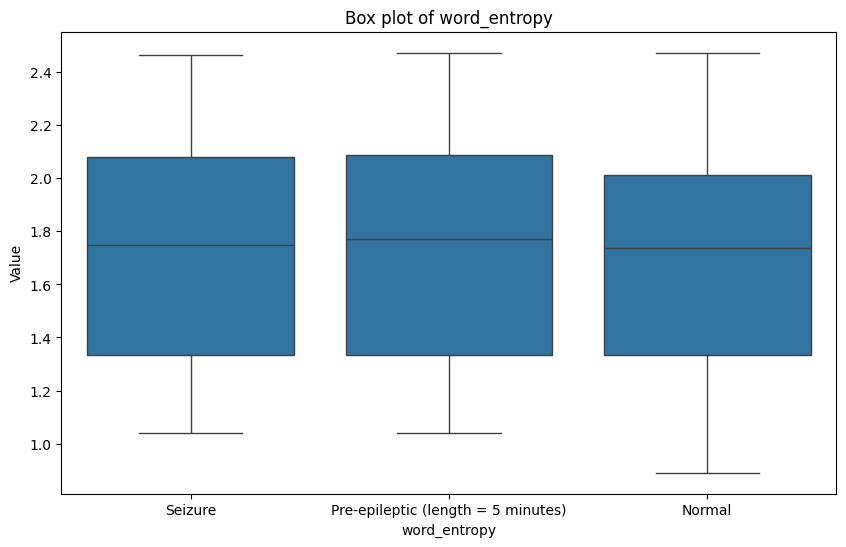

In [58]:
plot_all_graph('word_entropy')

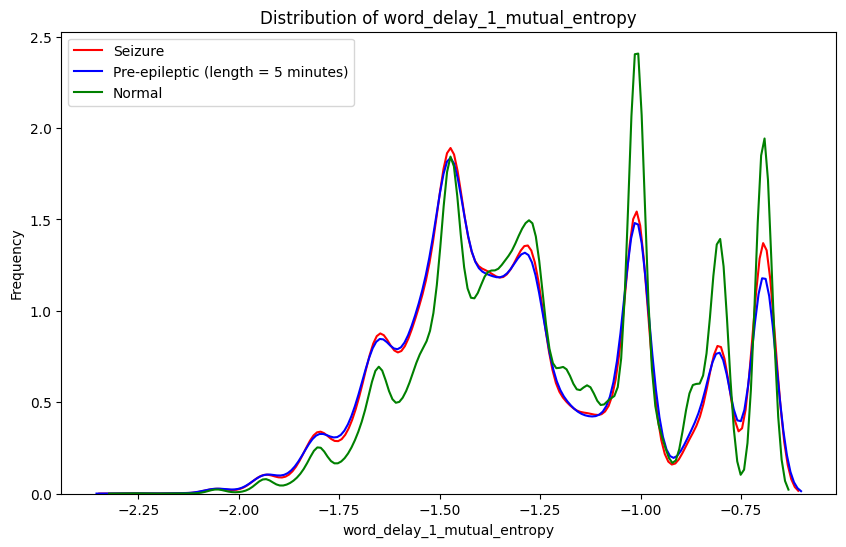

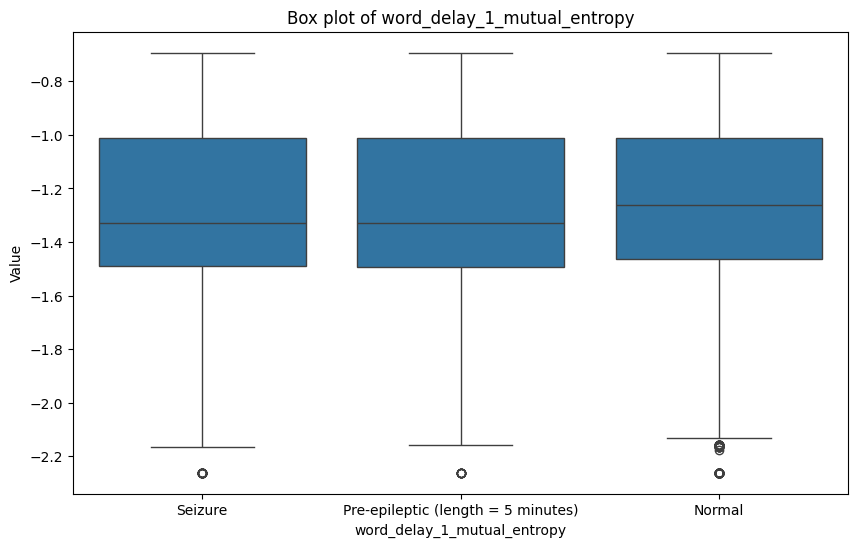

In [80]:
plot_all_graph('word_delay_1_mutual_entropy')

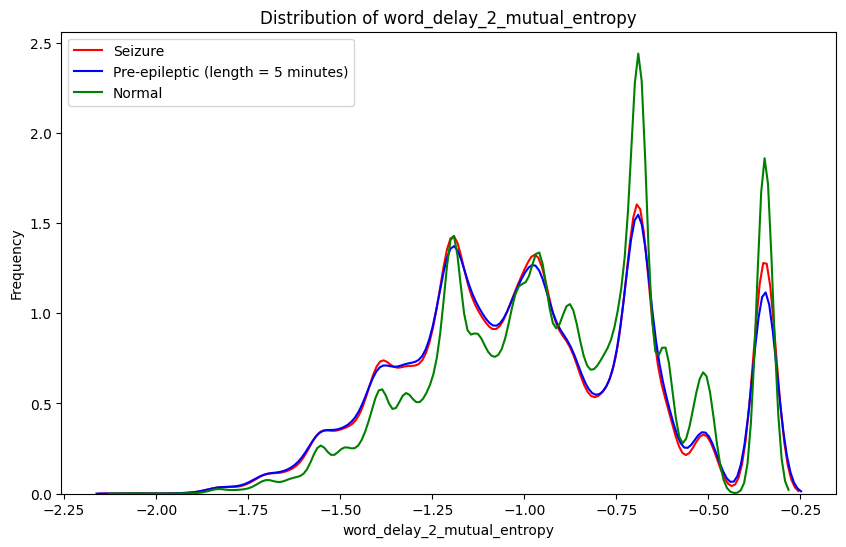

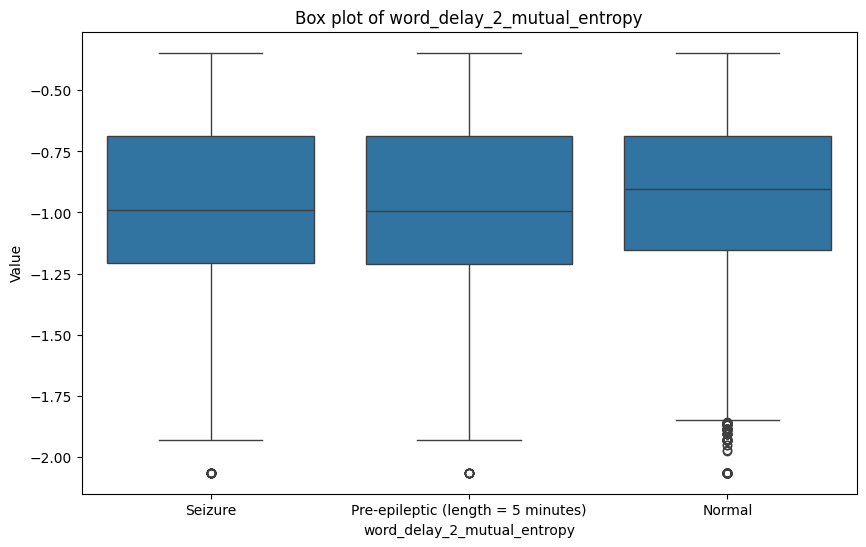

In [81]:
plot_all_graph('word_delay_2_mutual_entropy')

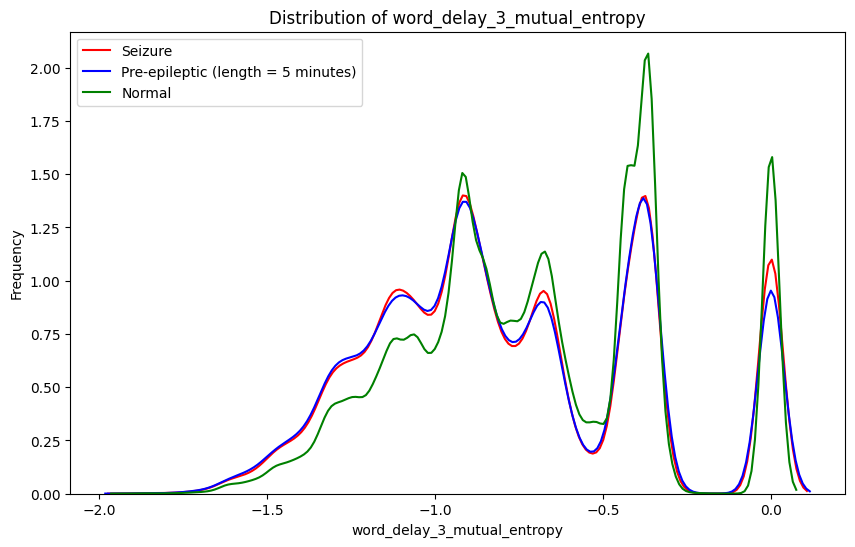

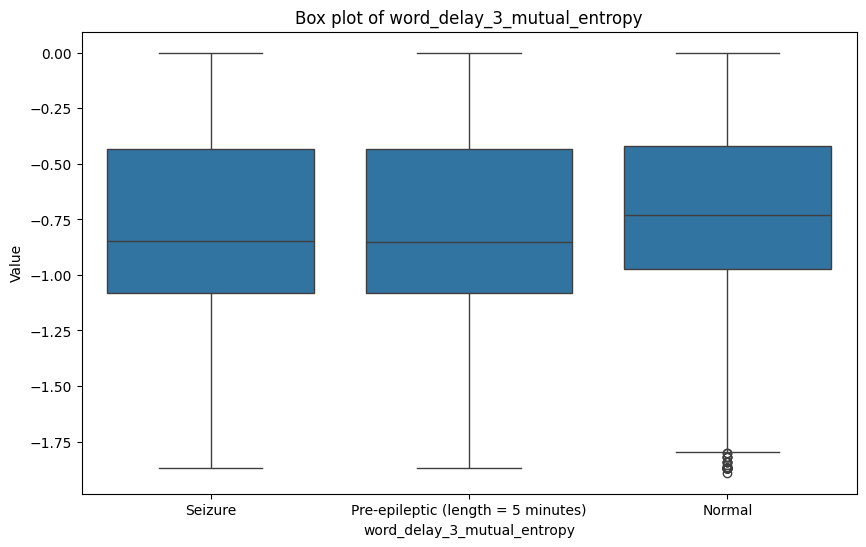

In [82]:
plot_all_graph('word_delay_3_mutual_entropy')

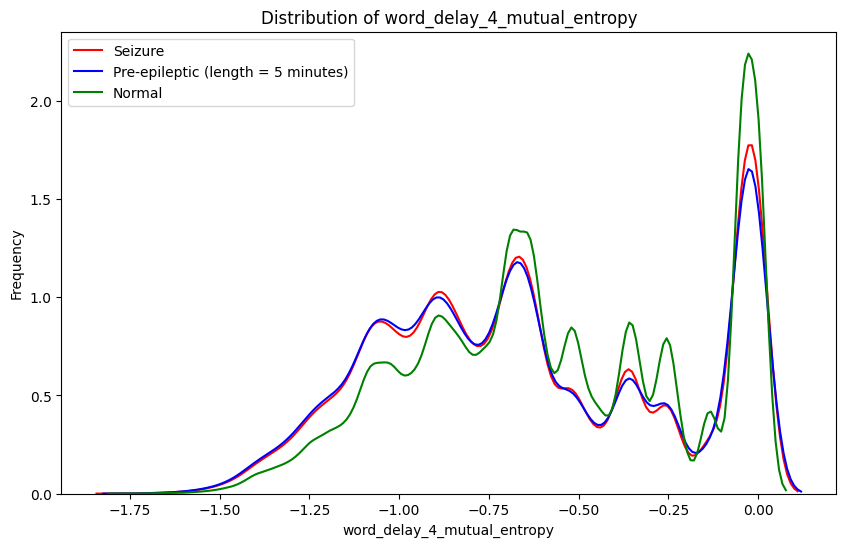

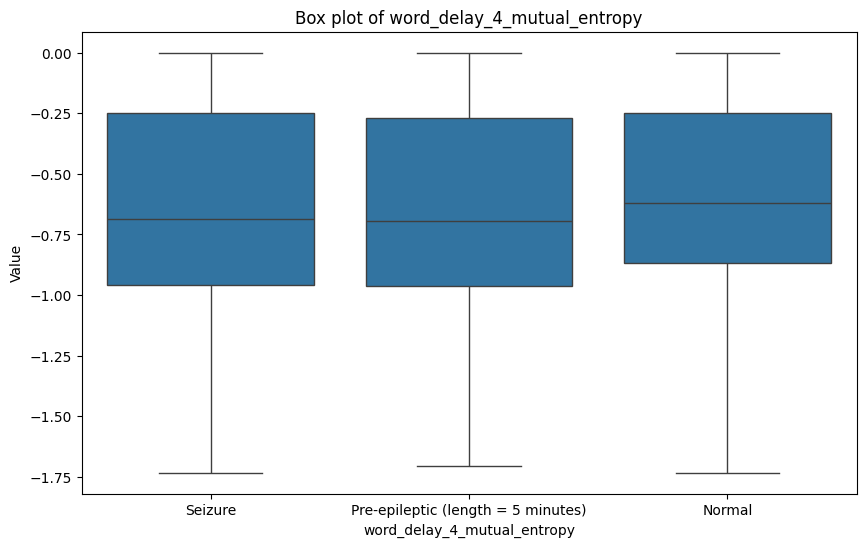

In [83]:
plot_all_graph('word_delay_4_mutual_entropy')

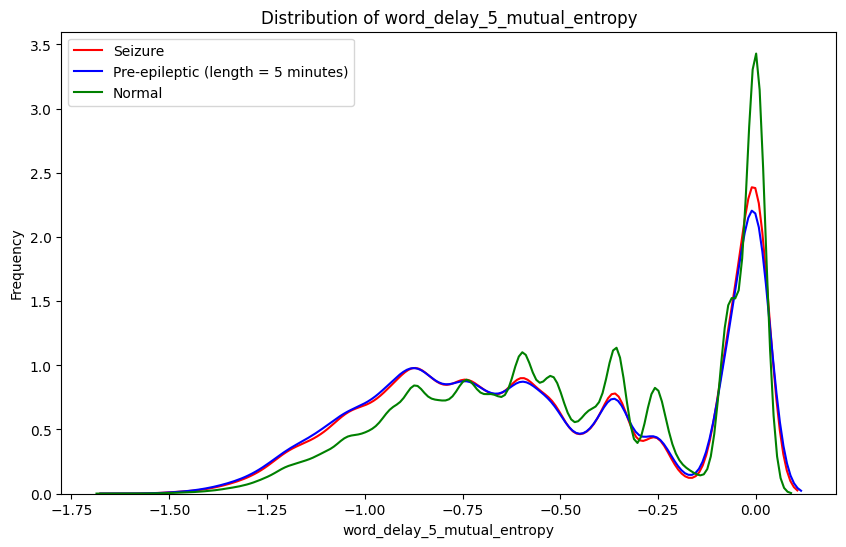

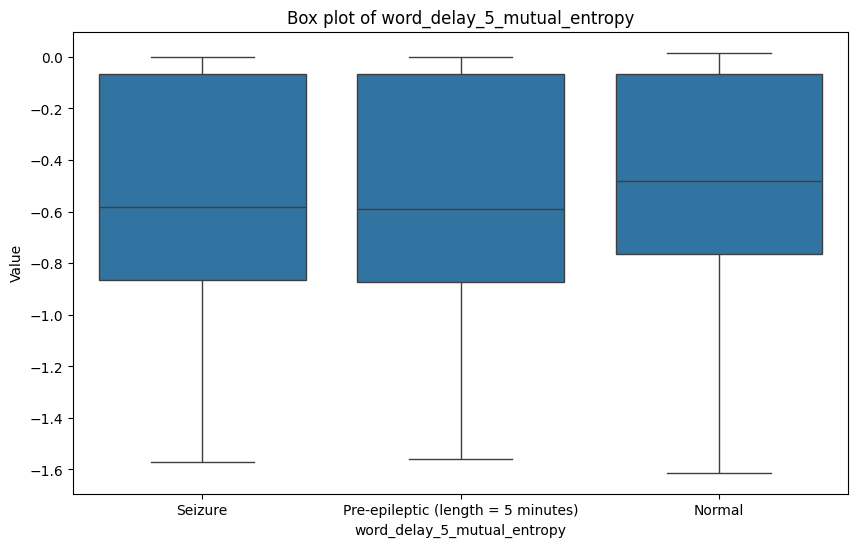

In [84]:
plot_all_graph('word_delay_5_mutual_entropy')

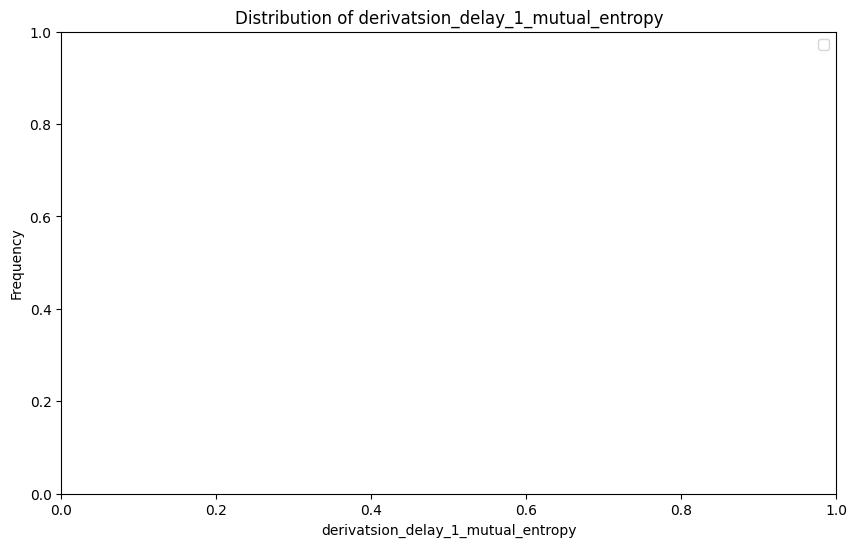

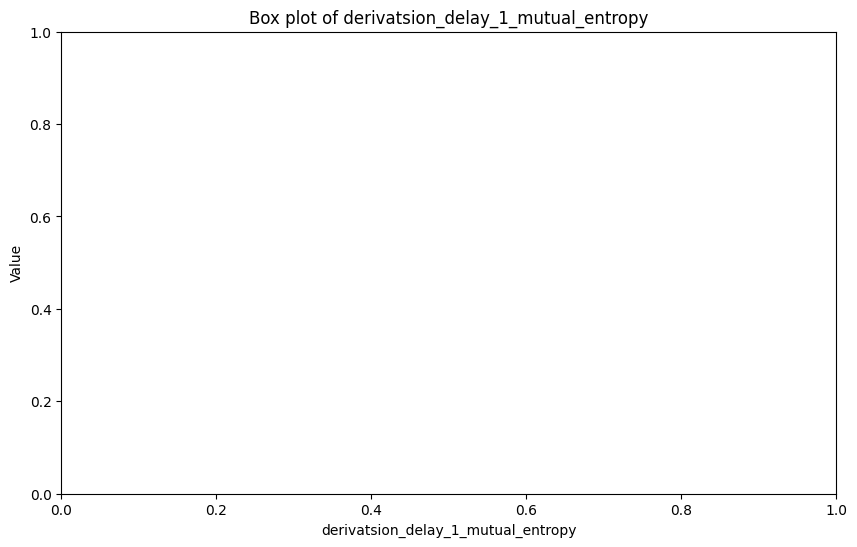

In [85]:
plot_all_graph('derivatsion_delay_1_mutual_entropy')

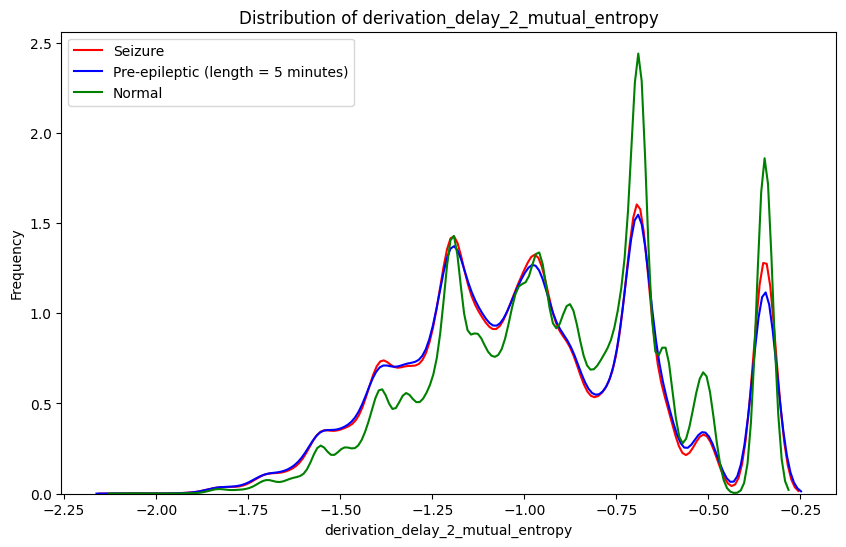

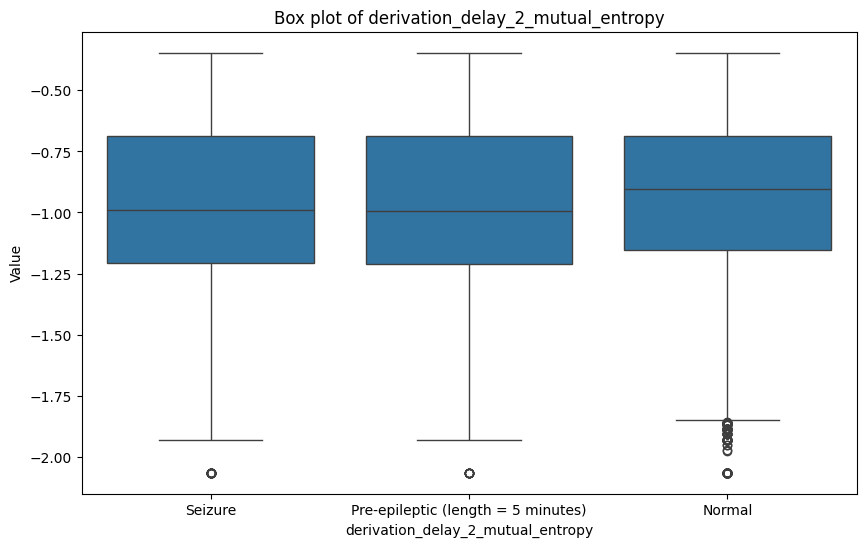

In [60]:
plot_all_graph('derivation_delay_2_mutual_entropy')

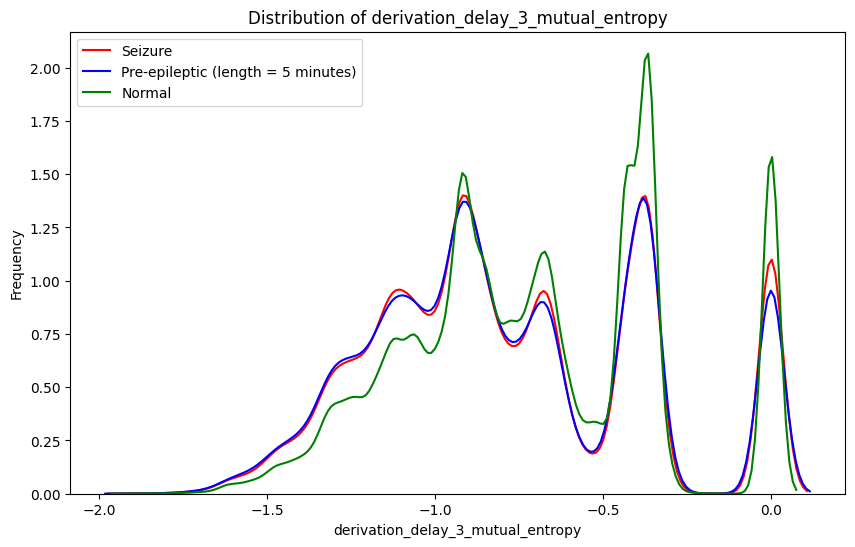

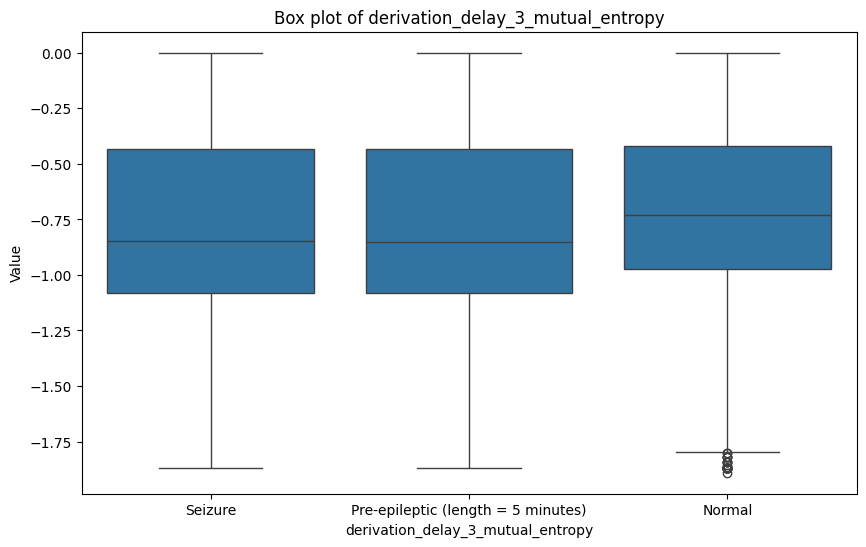

In [61]:
plot_all_graph('derivation_delay_3_mutual_entropy')

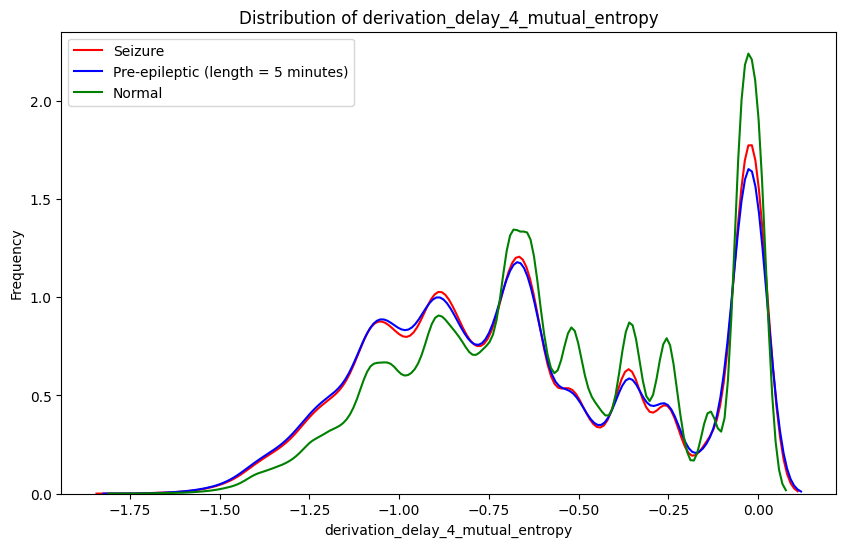

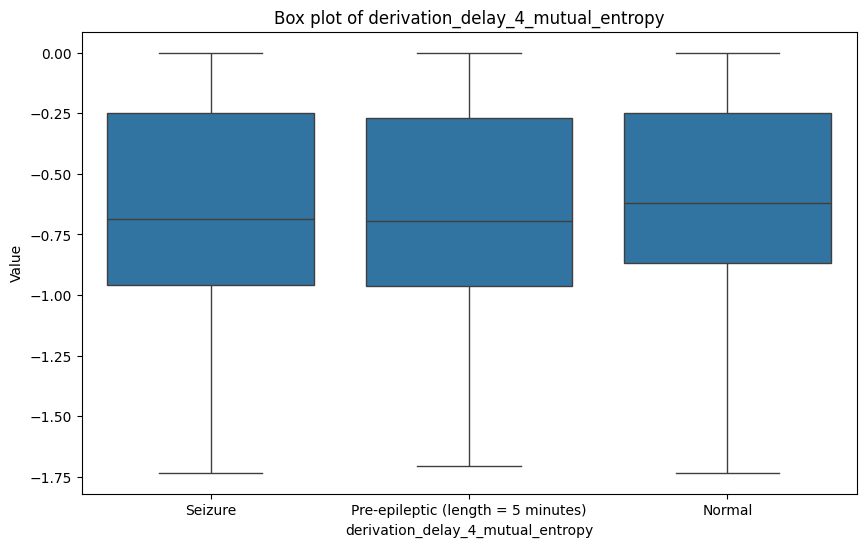

In [62]:
plot_all_graph('derivation_delay_4_mutual_entropy')

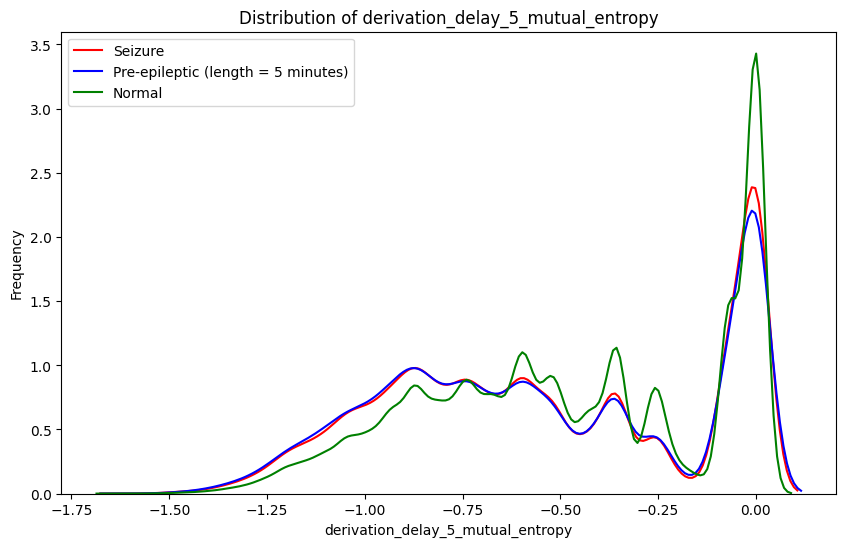

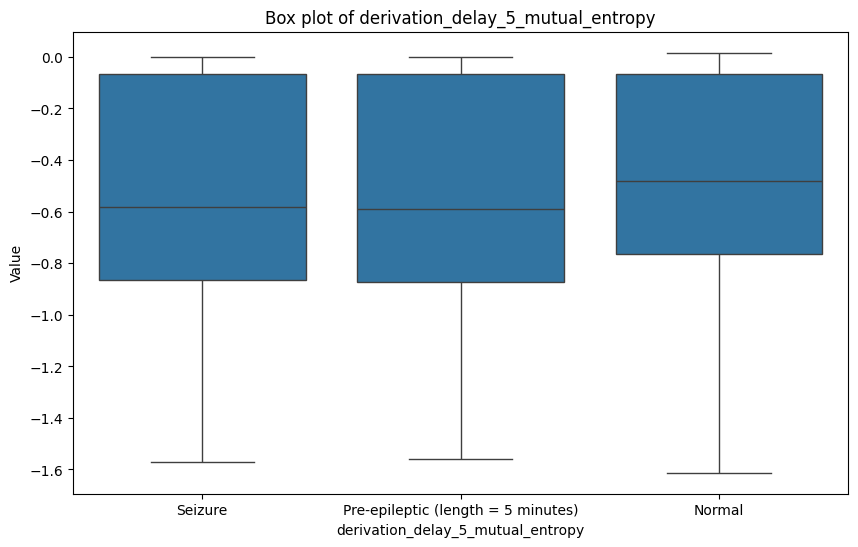

In [63]:
plot_all_graph('derivation_delay_5_mutual_entropy')

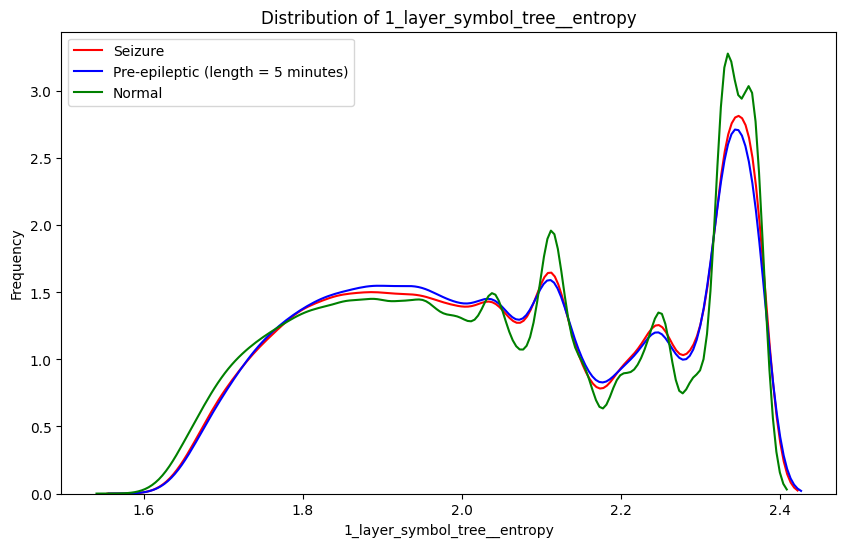

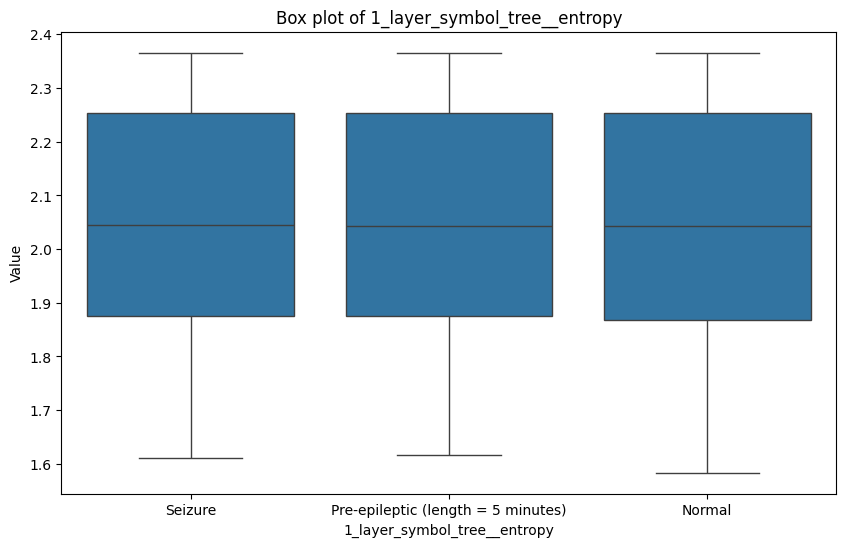

In [64]:
plot_all_graph('1_layer_symbol_tree__entropy')

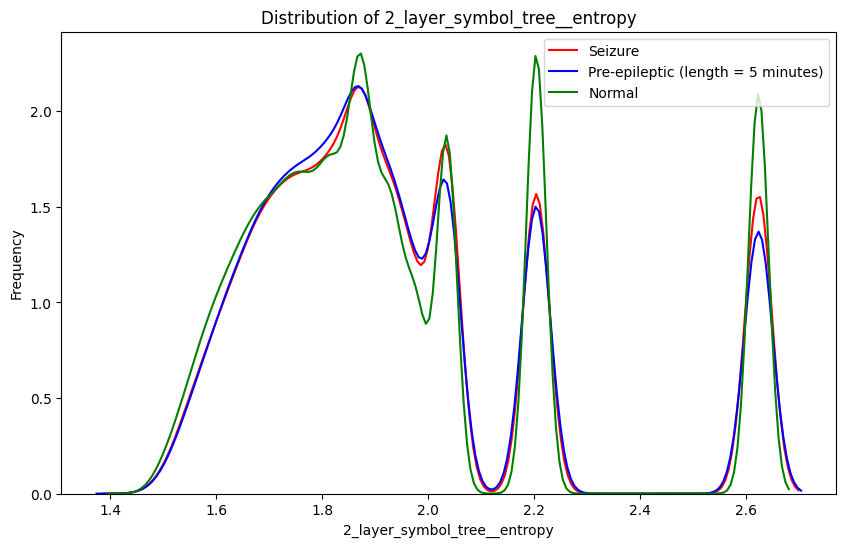

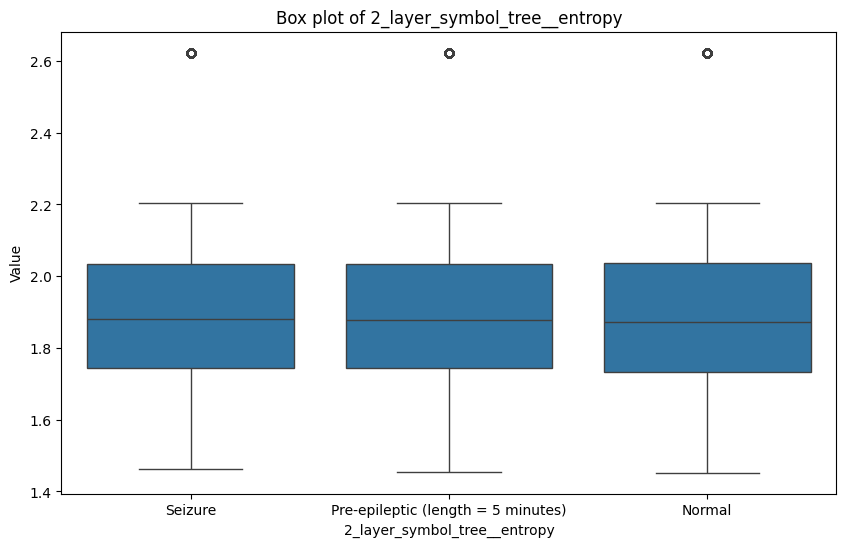

In [65]:
plot_all_graph('2_layer_symbol_tree__entropy')

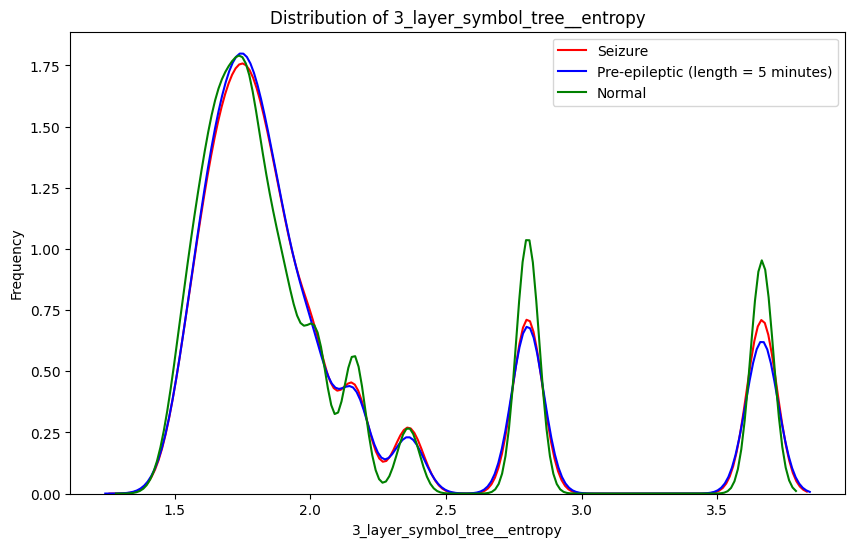

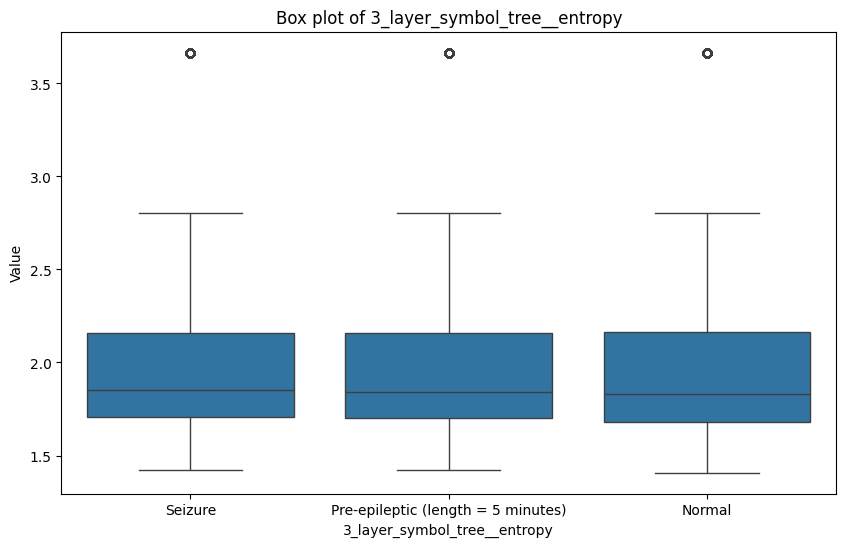

In [66]:
plot_all_graph('3_layer_symbol_tree__entropy')

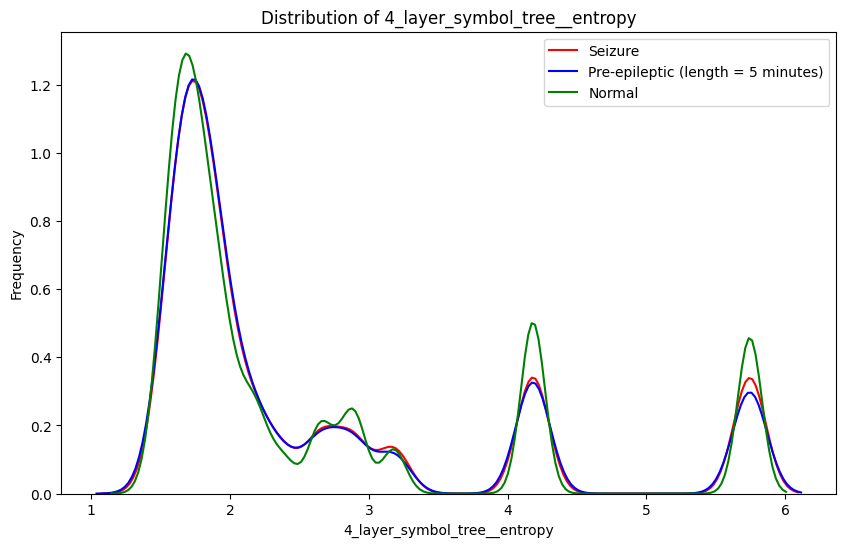

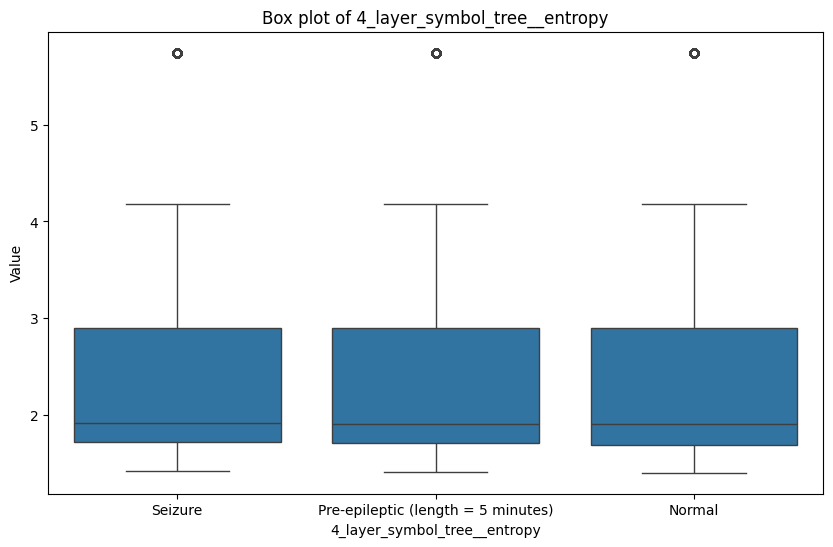

In [67]:
plot_all_graph('4_layer_symbol_tree__entropy')

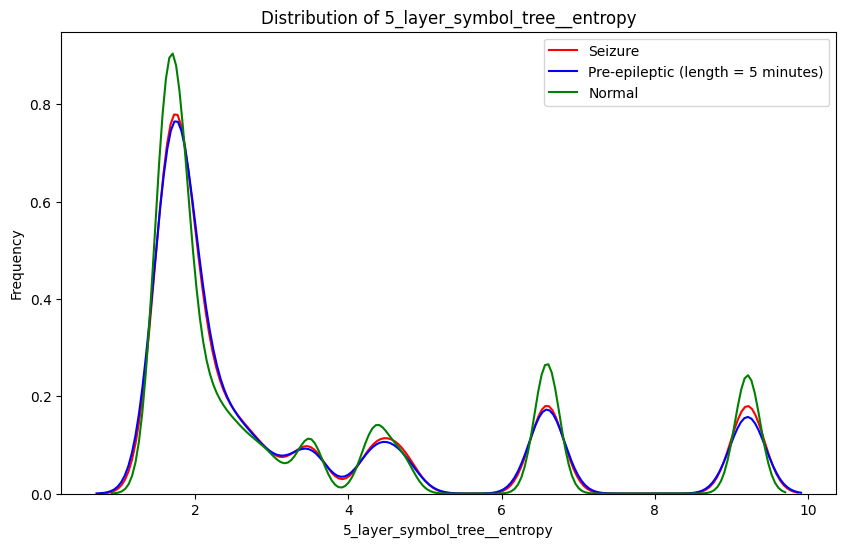

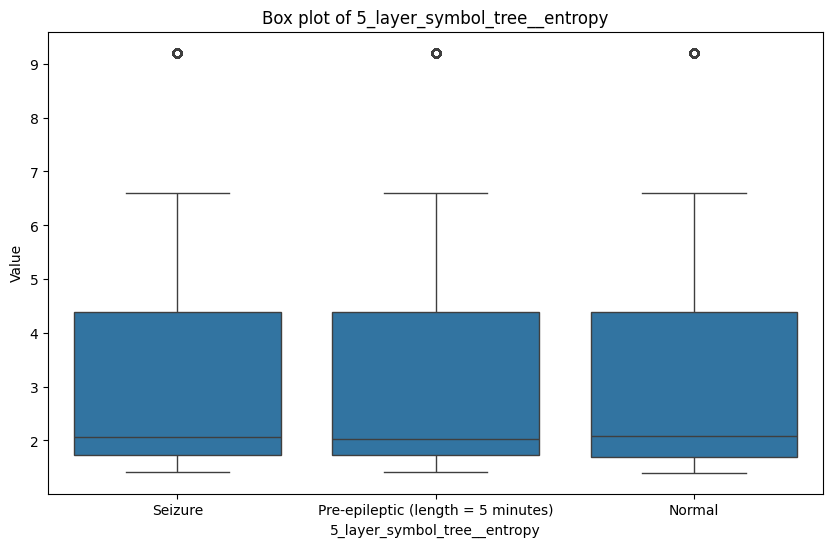

In [68]:
plot_all_graph('5_layer_symbol_tree__entropy')

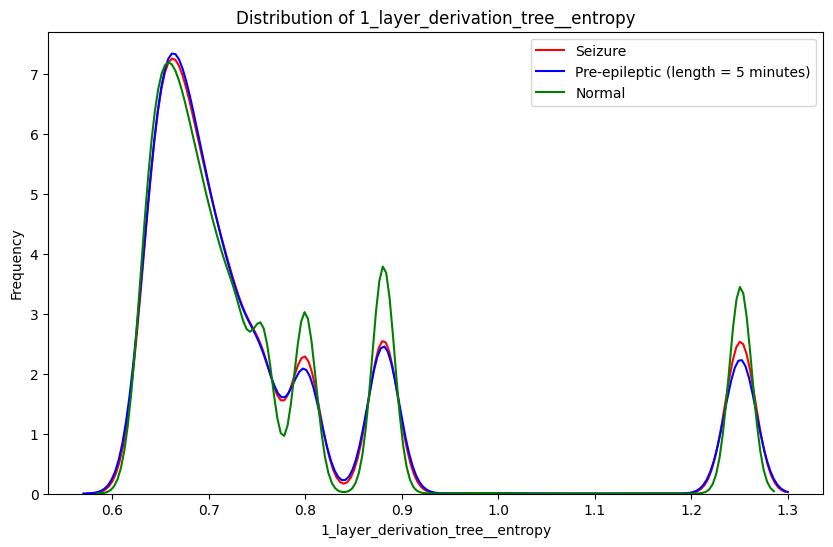

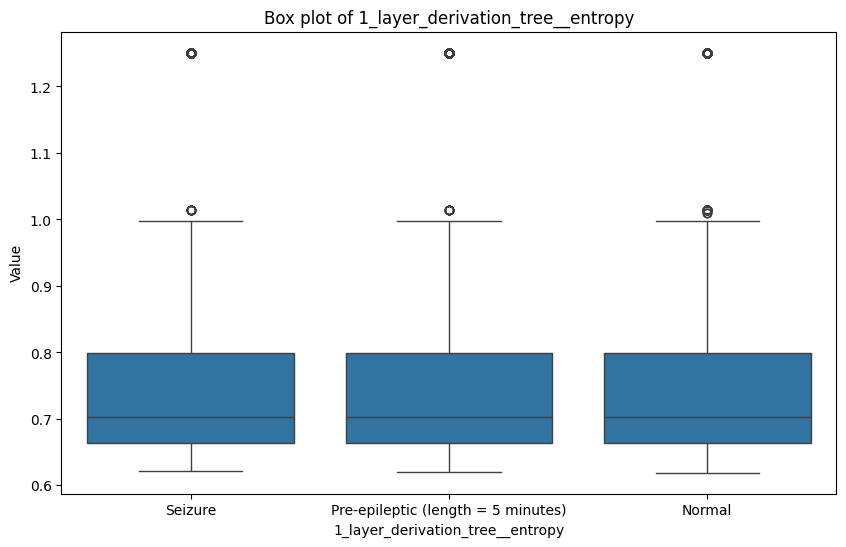

In [69]:
plot_all_graph('1_layer_derivation_tree__entropy')

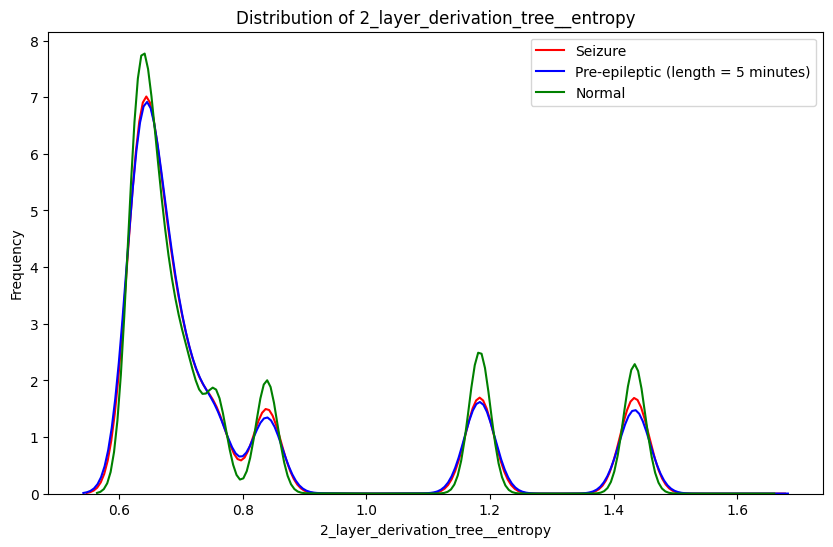

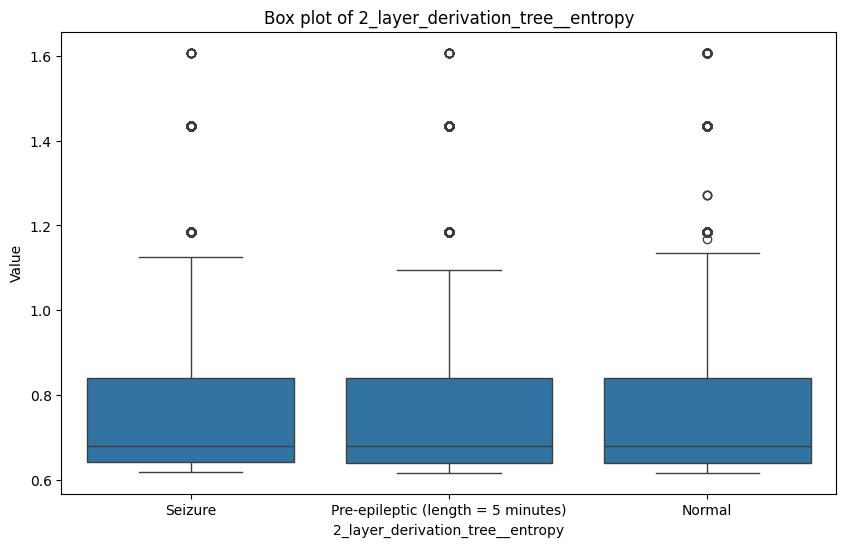

In [70]:
plot_all_graph('2_layer_derivation_tree__entropy')

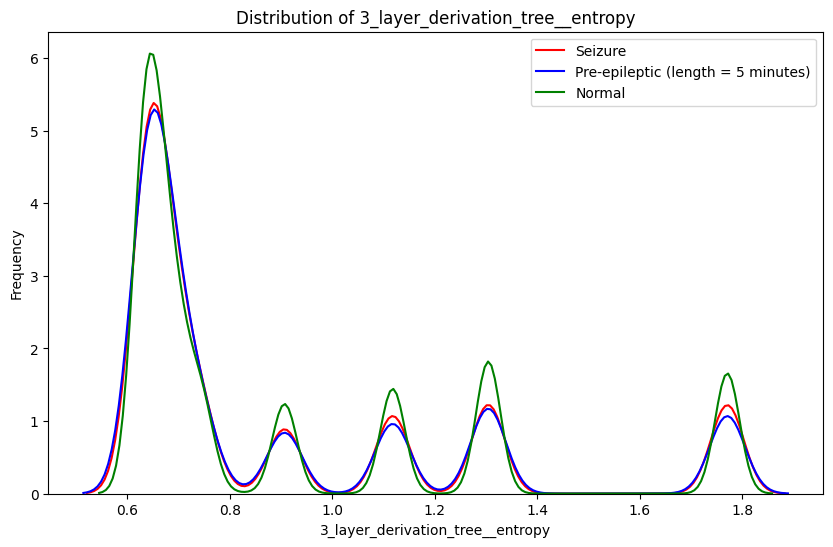

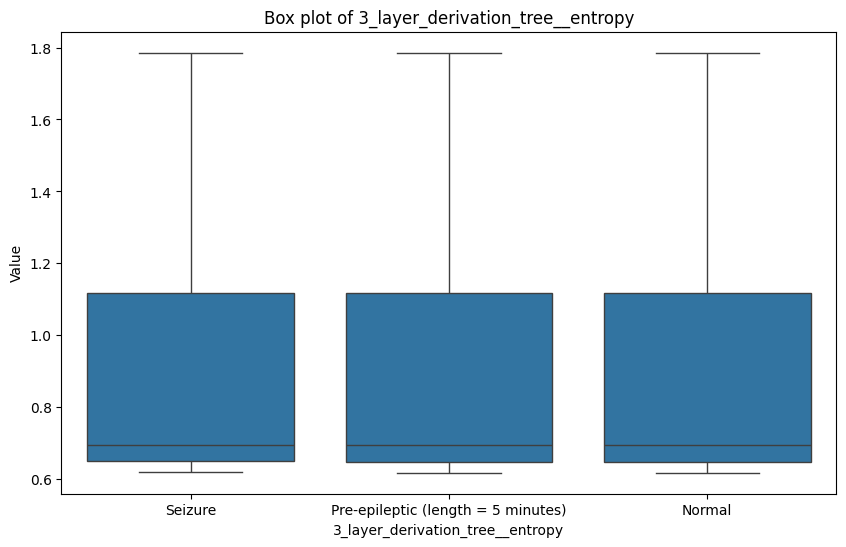

In [71]:
plot_all_graph('3_layer_derivation_tree__entropy')

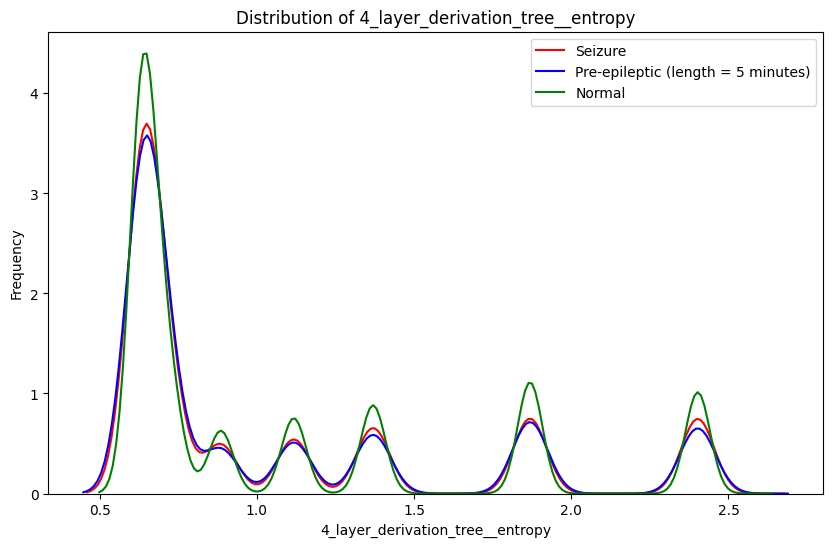

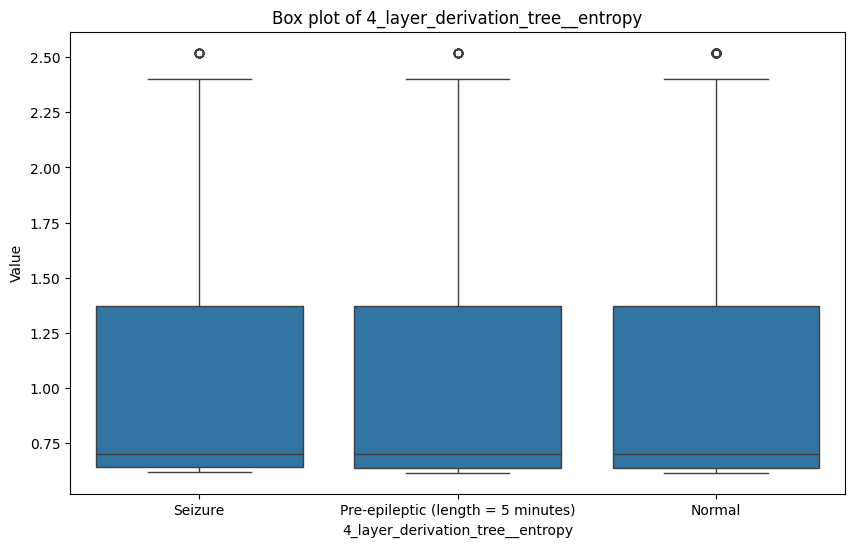

In [72]:
plot_all_graph('4_layer_derivation_tree__entropy')

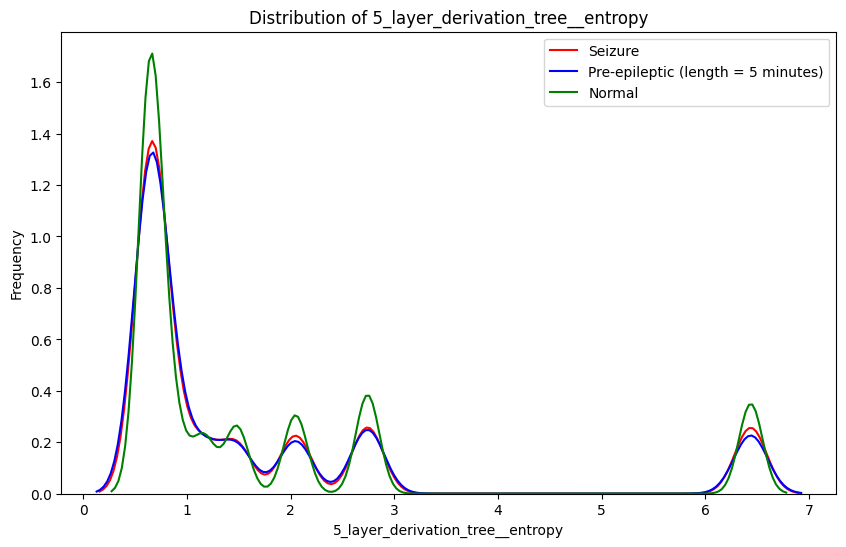

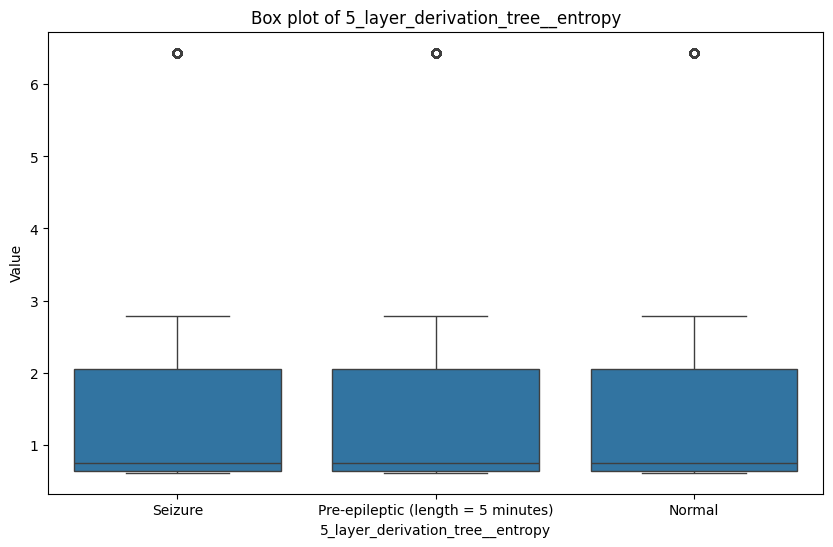

In [73]:
plot_all_graph('5_layer_derivation_tree__entropy')

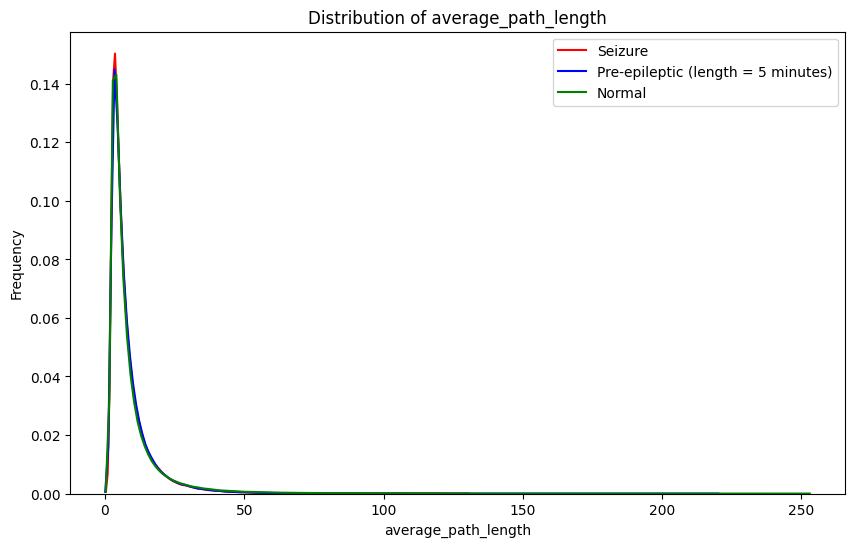

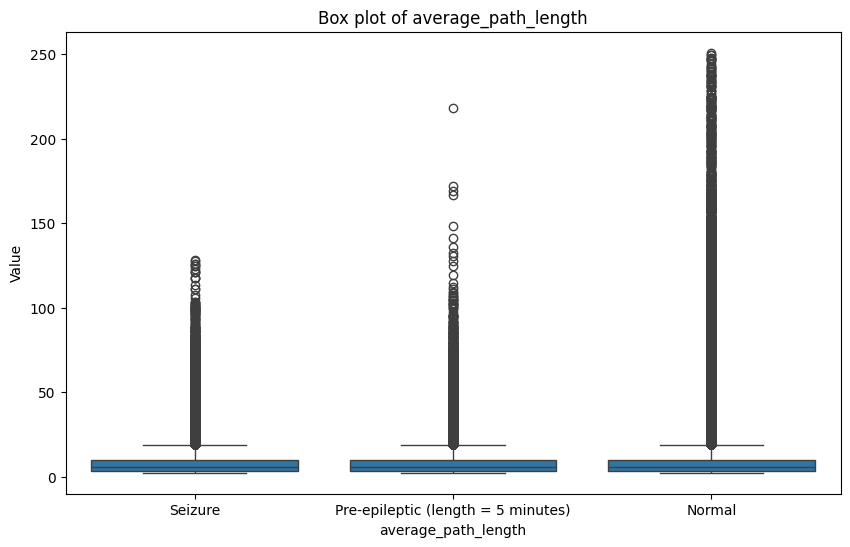

In [74]:
plot_all_graph('average_path_length')

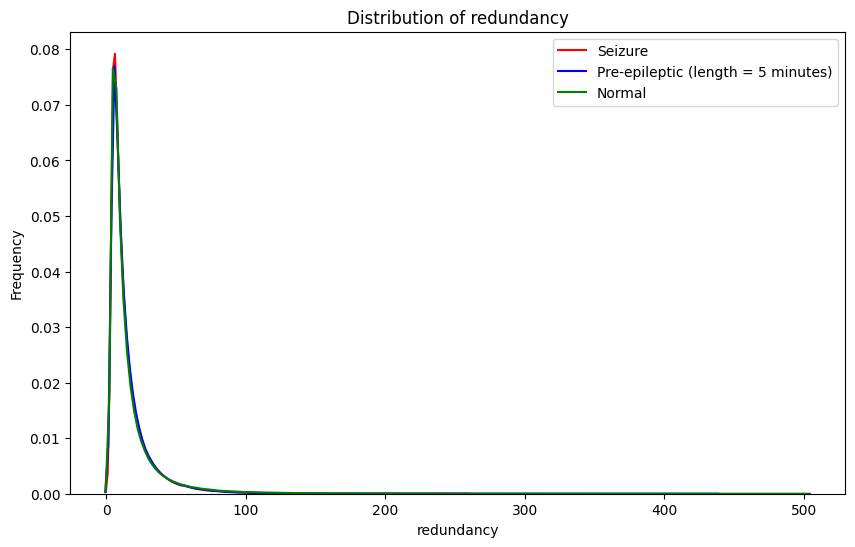

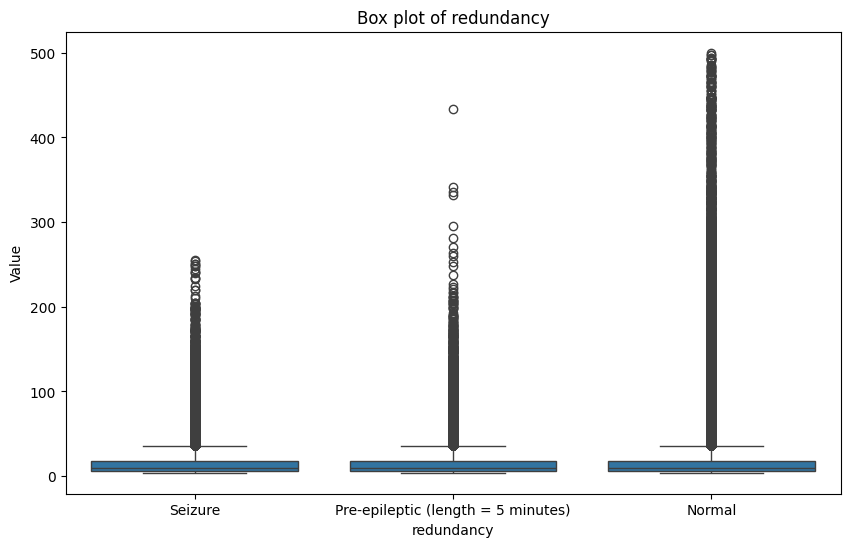

In [76]:
plot_all_graph('redundancy')

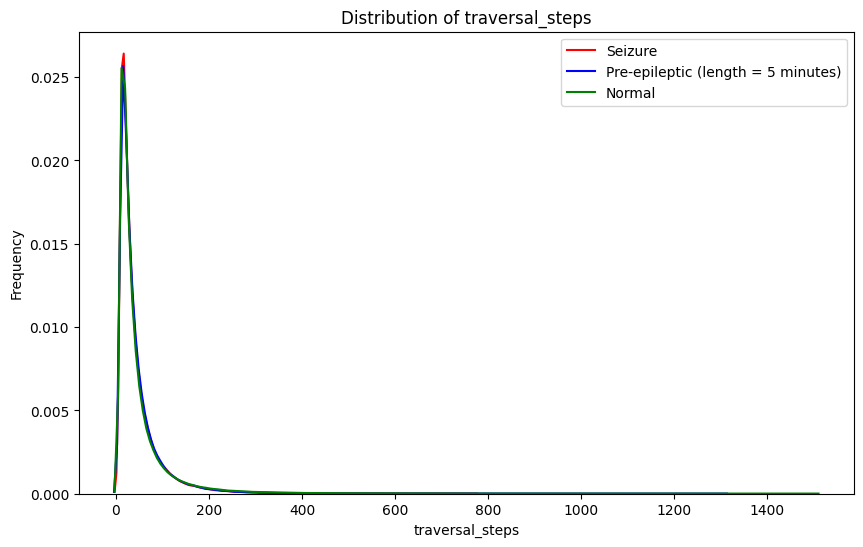

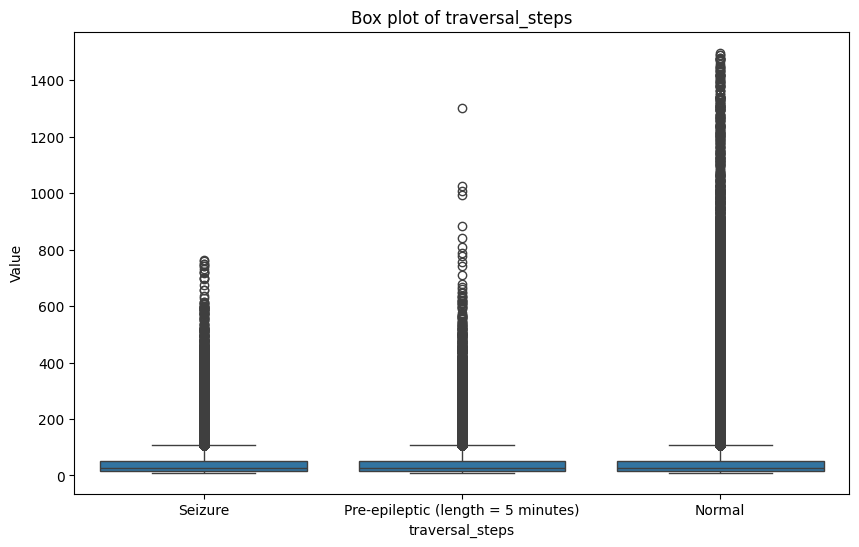

In [77]:
plot_all_graph('traversal_steps')

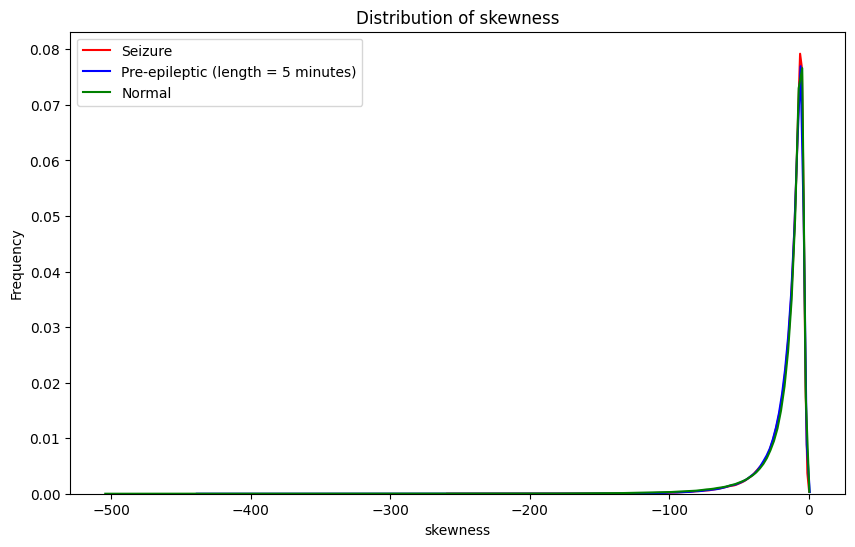

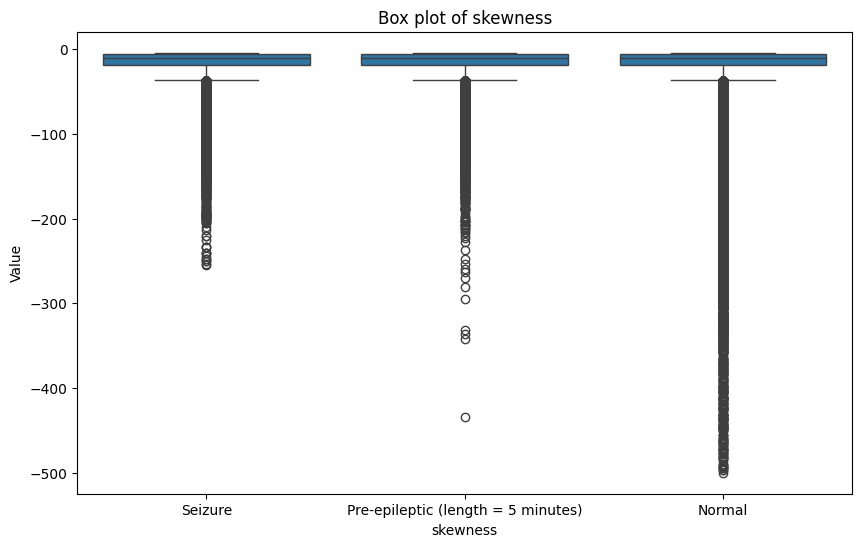

In [78]:
plot_all_graph('skewness')

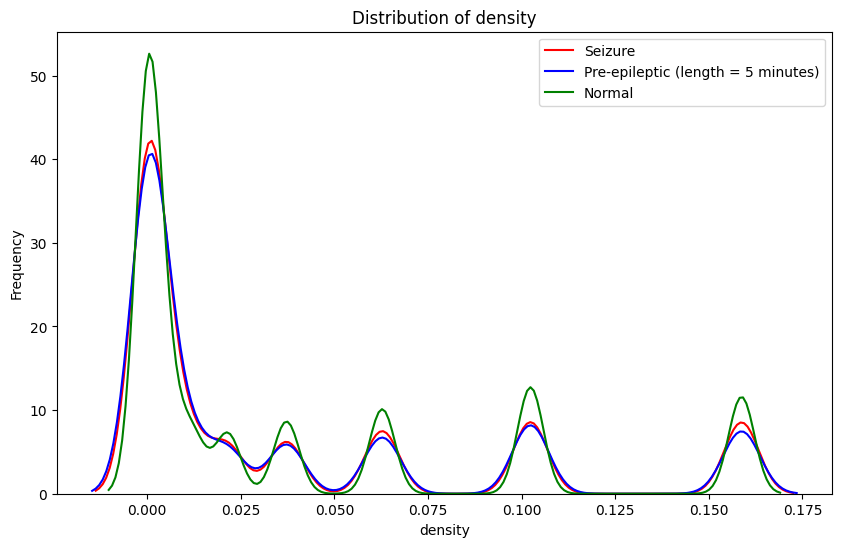

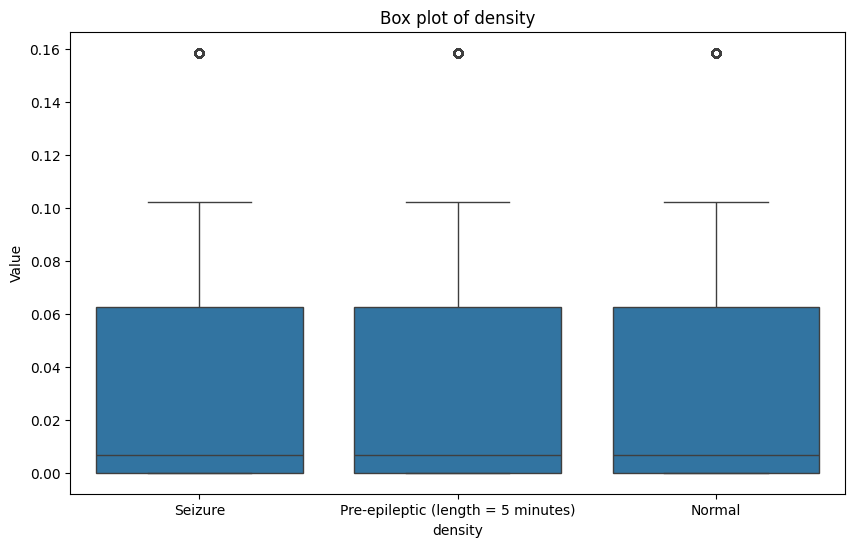

In [79]:
plot_all_graph('density')

In [9]:
keys

['derivation_entropy',
 'word_entropy',
 'word_delay_1_mutual_entropy',
 'word_delay_2_mutual_entropy',
 'word_delay_3_mutual_entropy',
 'word_delay_4_mutual_entropy',
 'word_delay_5_mutual_entropy',
 'derivation_delay_1_mutual_entropy',
 'derivation_delay_2_mutual_entropy',
 'derivation_delay_3_mutual_entropy',
 'derivation_delay_4_mutual_entropy',
 'derivation_delay_5_mutual_entropy',
 'depth_of_tree',
 '1_layer_symbol_tree__entropy',
 '2_layer_symbol_tree__entropy',
 '3_layer_symbol_tree__entropy',
 '4_layer_symbol_tree__entropy',
 '5_layer_symbol_tree__entropy',
 '1_layer_derivation_tree__entropy',
 '2_layer_derivation_tree__entropy',
 '3_layer_derivation_tree__entropy',
 '4_layer_derivation_tree__entropy',
 '5_layer_derivation_tree__entropy',
 'pre_2_end_6',
 'pre_2_end_5',
 'pre_2_end_4',
 'pre_2_end_3',
 'pre_2_end_2',
 'pre_3_end_6',
 'pre_3_end_5',
 'pre_3_end_4',
 'pre_3_end_3',
 'pre_4_end_6',
 'pre_4_end_5',
 'pre_4_end_4',
 'pre_5_end_6',
 'pre_5_end_5',
 'pre_6_end_6',
 '